# Import libraries

In [1]:
import pandas as pd
import requests
import json
from unidecode import unidecode
import matplotlib.pyplot as plt
import re

# Fetch the offers to jobmarket

In [2]:
# Request data from API
user = "hacomar@fulp.es"
clave = "Atenas.2023"
base_url = "https://www.jobmarketinsights.com/jmi-api/"
login_url = base_url + "token"
N_offers = 10000

# Log into API

In [3]:
def login():
    # Define the headers to set the Content-Type
    headers = {'Content-Type': 'application/json'}
    # Create a dictionary containing the data to send as JSON
    payload = {'email': user, 'password': clave}
    # Convert the payload to JSON format
    json_payload = json.dumps(payload)
    # Send the POST request with the specified headers and JSON data
    r = requests.post(login_url, data=json_payload, headers=headers)
    # Check if the request was successful (status code 200)
    if r.status_code == 200:
        # Parse the JSON response
        data = r.json()
        token = data["auth"]["token"]
        return token
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
token = login()
print(token)

VGWL3WQ4JB4HGZD7RE6KFXLMPVW7L35KXLIEAF427JMRAQK2S76Q


# Scope

In [4]:
scope_url = base_url + "scopes"
def get_scope(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(scope_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
response = get_scope(token)
scopes = response["scopes"][0]["key"]
print(scopes)

792


# Periods

In [5]:
# Ask for list with able periods
periods_url = base_url + "periods"
def get_periods(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(periods_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['periods']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
# Returns an array of dicts with 4 keys: from, label, to, key
periods = get_periods(token)
print(periods)
# For example, we will use the first period
period = periods[10]
initial_date = period['from']
end_date = period['to']

[{'from': '2023-10-12', 'label': 'Últimos días', 'to': '2023-10-16', 'key': 'ld'}, {'from': '2023-09-01', 'label': 'sep 2023', 'to': '2023-10-01', 'key': '2023-09'}, {'from': '2023-08-01', 'label': 'ago 2023', 'to': '2023-09-01', 'key': '2023-08'}, {'from': '2023-07-01', 'label': 'jul 2023', 'to': '2023-08-01', 'key': '2023-07'}, {'from': '2023-06-01', 'label': 'jun 2023', 'to': '2023-07-01', 'key': '2023-06'}, {'from': '2023-05-01', 'label': 'may 2023', 'to': '2023-06-01', 'key': '2023-05'}, {'from': '2023-04-01', 'label': 'abr 2023', 'to': '2023-05-01', 'key': '2023-04'}, {'from': '2023-03-01', 'label': 'mar 2023', 'to': '2023-04-01', 'key': '2023-03'}, {'from': '2023-02-01', 'label': 'feb 2023', 'to': '2023-03-01', 'key': '2023-02'}, {'from': '2023-01-01', 'label': 'ene 2023', 'to': '2023-02-01', 'key': '2023-01'}, {'from': '2022-12-01', 'label': 'dic 2022', 'to': '2023-01-01', 'key': '2022-12'}, {'from': '2022-11-01', 'label': 'nov 2022', 'to': '2022-12-01', 'key': '2022-11'}, {'fr

# Missing advertisers

In [6]:
missing_adverts_url = base_url + "missingAdvertisers"

def create_payload(token, initial_date, end_date, size=100, offset=0):
    payload = {'strictPeriod': True, 'location': 'ES', 'token': token,"period" : "custom", "customDateFrom": initial_date, "customDateTo": end_date, "offset": offset}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    return json_payload, headers

def get_missing_adverts(token, scope, initial_date, end_date, size=100, offset=0):
    payload, headers = create_payload(token, scope, initial_date, end_date, size, offset)
    json_payload = json.dumps(payload)
    r = requests.post(missing_adverts_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
# print(get_missing_adverts(token, scopes, initial_date, end_date))

# Sites

In [7]:
sites_url = base_url + "sites"
def get_sites(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(sites_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
response = get_sites(token)
print(response)

{'total': {'offers': 263256, 'companies': 50982}, 'auth': {'token': 'VGWL3WQ4JB4HGZD7RE6KFXLMPVW7L35KXLIEAF427JMRAQK2S76Q'}, 'sites': [{'offers': 80875, 'companies': 17122, 'label': 'infojobs.net', 'key': '1963'}, {'offers': 40338, 'companies': 3875, 'label': 'es.talent.com', 'key': '4142'}, {'offers': 39185, 'companies': 13518, 'label': 'linkedin.com', 'key': '3455'}, {'offers': 37980, 'companies': 7484, 'label': 'indeed', 'key': '3427'}, {'offers': 20727, 'companies': 9269, 'label': 'jobtoday.com', 'key': '4023'}, {'offers': 14223, 'companies': 5505, 'label': 'glassdoor.com', 'key': '3933'}, {'offers': 11233, 'companies': 1030, 'label': 'empleate.gob.es', 'key': '4058'}, {'offers': 11148, 'companies': 472, 'label': 'iberempleos.es', 'key': '4254'}, {'offers': 10986, 'companies': 380, 'label': 'epreselec.com', 'key': '4186'}, {'offers': 5909, 'companies': 1191, 'label': 'monster.es', 'key': '3464'}, {'offers': 5175, 'companies': 353, 'label': 'infoempleo.com', 'key': '3451'}, {'offers

# Offers

In [8]:
offers_url = base_url + "offers"
def get_offers(token, initial_date, end_date, size=100, offset=0, site=None):
    json_payload, headers = create_payload(token, initial_date, end_date, size, offset)
    # Add the site to the payload
    site = {"site" : "1963"}
    payload = json.loads(json_payload)
    payload.update(site)
    json_payload = json.dumps(payload)
    r = requests.post(offers_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['offers']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
initial_date = '2023-10-09'
end_date = '2023-10-12'
response = get_offers(token, initial_date, end_date, size=1, offset=1)
print(response[0])


{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPVW7L35KXLIEAF427JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-09", "customDateTo": "2023-10-12", "offset": 1, "site": "1963"}
{'description': '¡Hola!¡Queremos conocerte!\n\n¿Te apasiona el mundo del comercio? ¿Te preocupas por los detalles? ¿Te consideras una persona dinámica? ¡Te estábamos esperando! \n\nCarrefour es una empresa líder en comercio de alimentación y distribución y queremos que inicies una carrera profesional llena de posibilidades con nuestros mejores profesionales. \n\nPretendemos que todos los días sean un aprendizaje, que crezcas y llegues tan lejos como quieras. Te ofrecemos formación a cargo de la empresa y la posibilidad de promocionar internamente para seguir creciendo con nosotros.\n\n¿Qué buscamos? \n\nCarrefour lo formamos un equipo de personas orientadas al Cliente, siempre con ganas de aprender e innovar en cuanto a la experiencia de compra en nuestras tiendas.\n\nPara

# Offers count

In [9]:
count_url = base_url + "count"

def get_count(token, initial_date, end_date):
    payload = {'token': token, "period" : "custom", "customDateFrom": initial_date, "customDateTo": end_date, "location":"ES|53|GC"}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(count_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['offers']['market']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
    
def get_all_offers(token, periods, max_offers=1000):
    offers = []
    for period in periods:
        initial_date = period['from']
        end_date = period['to']
        print(f"Period: {initial_date} - {end_date}")
        count = get_count(token, initial_date, end_date)
        print(f"Count: {count}")
        for index in range(0, count, 100):
            if count - index < 100:
                size = count - index
            else:
                size = 100
            response = get_offers(token, initial_date, end_date, size=size, offset=index)
            offers.extend(response)
            if len(offers) >= max_offers:
                return offers
    return offers
offers_news = get_all_offers(token, periods, max_offers=N_offers)


Period: 2023-10-12 - 2023-10-16
Count: 3610
{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPVW7L35KXLIEAF427JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-12", "customDateTo": "2023-10-16", "offset": 0, "site": "1963"}
{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPVW7L35KXLIEAF427JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-12", "customDateTo": "2023-10-16", "offset": 100, "site": "1963"}
{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPVW7L35KXLIEAF427JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-12", "customDateTo": "2023-10-16", "offset": 200, "site": "1963"}
{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPVW7L35KXLIEAF427JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-12", "customDateTo": "2023-10-16", "offset": 300, "site": "1963"}
{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPVW7L35

In [10]:
def format_offer(offer):
    expected_keys = ['title', 'description', 'company', 'location', 'category']
    expected_keys_post = ['date', 'site', 'id', 'url']
    expected_keys_labeled = ['category', 'site', 'location']
    formated_offer = {}
    for key in expected_keys:
        if key not in offer:
            formated_offer[key] = None
        else:
            if key in expected_keys_labeled:
                formated_offer[key] = offer[key]['label']
            else:
                formated_offer[key] = offer[key]
    post = get_last_record(offer['postings'])
    for key in expected_keys_post:
        if key not in post:
            formated_offer[key] = None
        else:
            if key in expected_keys_labeled:
                formated_offer[key] = post[key]['label']
            else:
                formated_offer[key] = post[key]
    return formated_offer

def get_last_record(postings):
    dates = []
    for post in postings:
        dates.append(post['date'])
    # Get index of the last date
    index = dates.index(max(dates))
    return postings[index]

def format_all_offers(offers):
    formated_offers = []
    for offer in offers:
        formated_offers.append(format_offer(offer))
    return formated_offers

formated_offers = format_all_offers(offers_news)

def set_id_oferta(offer):
    offer['id_oferta'] = offer['id']
    del offer['id']
    return offer

# Set the id_oferta for each offer
formated_offers = list(map(set_id_oferta, formated_offers))

with open("offers.txt",'w') as f:
    for offer in formated_offers:
        f.write(str(offer['description']) + "\n\n##############\n\n")

# Read INFOJOBS_ESTUDIOS dataset

In [11]:
df = pd.read_json("INFOJOBS_ESTUDIOS.json")
# Clean df
df = df[df['nivel'] != "(Seleccionar)"]
# Read expection_list.txt
with open("expection_list.txt", 'r') as f:
    expection_list = f.read().splitlines()


def format_denominacion(denominacion):
    for expection in expection_list:
        if expection in denominacion:
            denominacion = denominacion.replace(expection, "")
    return unidecode(denominacion).lower().strip()


df["nivel_formated"] = df["nivel"].apply(format_denominacion)
df["denominacion_formated"] = df["denominacion"].apply(format_denominacion)
# Read id_to_nivel.json
df_id = pd.read_json("id_to_nivel.json")
# Apply the format_denominacion function to the column 'nivel' of df_id
df_id['nivel_formated'] = df_id['nivel'].apply(format_denominacion)
id_to_titulacion = dict(zip(df_id['id'], df_id['nivel_formated']))
id_to_titulacion_raw = dict(zip(df_id['id'], df_id['nivel']))
# Create a dictionary to cast from 'denominacion_formated' to 'denominacion'
niveles_df = pd.read_json("niveles_estudio.json")
niveles_df['denominacion_formated'] = niveles_df['denominacion'].apply(
    format_denominacion)
# Cast from df to dict key: denominacion, value: nivel
denominacion_to_id_nivel = {}
for denominacion, group in niveles_df.groupby('denominacion_formated'):
    denominacion_to_id_nivel[denominacion] = int(group['id_nivel'].tolist()[0])
# Create a dictionary
denominacion_to_titulacion = {}
for denominacion, group in df.groupby('denominacion_formated'):
    denominacion_to_titulacion[denominacion] = group['nivel_formated'].tolist()
# Create a dictionary
id_nivel_to_titulacion = {}
for id_nivel, group in df.groupby('id_nivel'):
    id_nivel_to_titulacion[id_nivel] = group['nivel_formated'].tolist()
id_nivel_to_id = {}
for id_nivel, group in df.groupby('id_nivel'):
    id_nivel_to_id[id_nivel] = group['id'].tolist()


# Load custom correlations

In [12]:
def read_property_correlations(file_path, correlations, option='niveles'):
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('->')
            property_name = parts[0]
            corresponding_parts = parts[1].split(',')
            # Check if the property already exists in correlations
            correlations[property_name] = []
            for corresponding_part in corresponding_parts:
                if property_name not in correlations:
                    continue
                if option == 'niveles':
                    correlations[property_name].append(correlations[corresponding_part])
                elif option == 'titles':
                    correlations[property_name].extend(correlations[corresponding_part])
    try:
        del correlations['grado']
    except:
        print("Already deleted grado")
    return correlations

# Example usage:
file_path = './correlations.txt'
denominacion_to_id_nivel = read_property_correlations(file_path, denominacion_to_id_nivel, option='niveles')
denominacion_to_titulacion = read_property_correlations(file_path, denominacion_to_titulacion, option='titles')

# Test search function

In [13]:
def get_niveles(niveles, description):
    obteined_niveles = []
    for nivel in niveles.keys():
        pattern = r'\b' + re.escape(nivel) + r'\b'
        if re.search(pattern, description):
            obteined_niveles.append(nivel)
    return obteined_niveles


def get_id_titulo(obteined_titles, mapping_id, id_nivel_to_id):
    id_titulos = []
    for title in obteined_titles:
        id_nivel = title['id_nivel']
        ids = id_nivel_to_id[id_nivel]
        titulo = title['titulo']
        for id in ids:
            if id in mapping_id:
                if titulo == mapping_id[id]:
                    id_titulos.append(id)
    return id_titulos


def get_titulo(description, numerical_niveles, id_nivel_to_titulacion):
    # Get all the possible titulaciones from id_nivel_to_titulacion with the numerical_niveles
    obteined_titles = []
    for nivel in numerical_niveles:
        if nivel in id_nivel_to_titulacion:
            titulos = id_nivel_to_titulacion[nivel]
            for titulo in titulos:
                pattern = r'\b' + re.escape(titulo) + r'\b'
                if re.search(pattern, description):
                    obteined_titles.append(
                        {'id_nivel': nivel, 'titulo': titulo})
    return obteined_titles


def add_nivel_to_offer(denominacion_to_id_nivel, obteined_niveles):
    # Find for each nivel the corresponding id
    numerical_niveles = []
    for nivel in obteined_niveles:
        # Denonimacion_to_id_nivel[nivel] can be a int or a list of ints
        if isinstance(denominacion_to_id_nivel[nivel], int):
            numerical_niveles.append(denominacion_to_id_nivel[nivel])
        else:
            numerical_niveles.extend(denominacion_to_id_nivel[nivel])
    # Delete repeated values
    numerical_niveles = list(set(numerical_niveles))
    return numerical_niveles


def get_min_and_max_nivel(offer):
    if len(offer['numerical_niveles']) == 1:
        return offer['numerical_niveles'][0], offer['numerical_niveles'][0]
    return min(offer['numerical_niveles']), max(offer['numerical_niveles'])


def verify_grado(titles, description, N=15):
    # Get the index of the word "grado" in the description
    index = description.find("grado")
    # Get the N words before and after the word "grado" in the description
    words = description[index-N:index+N]
    # Verify if the obtained titles are in the words
    for title in titles["grado"]:
        if title in words:
            return True
    return False

def insert_raw_titles(obteined_titles, mapping_id_raw):
    raw_titles = []
    for title in obteined_titles:
        raw_titles.append(mapping_id_raw[title])
    return raw_titles

def normalize_offer(denominacion_to_id_nivel, titulacion_to_id, id_to_titulacion_raw, id_nivel_to_titulacion, id_nivel_to_id, offer, estrict=False):
    description = unidecode(offer['description']).lower()
    # Verify if the offer description have "Requisitos"
    if estrict:
        if "requisitos" not in description:
            return offer
        description = description[description.find("requisitos"):]
    obteined_niveles = get_niveles(denominacion_to_id_nivel, description)
    if len(obteined_niveles) > 0:
        offer['denominacion_nivel'] = obteined_niveles
        offer['numerical_niveles'] = add_nivel_to_offer(
            denominacion_to_id_nivel, obteined_niveles)
        offer['min_nivel'], offer['max_nivel'] = get_min_and_max_nivel(offer)
        # TODO: Filter description by finded denominacion_nivel and get words before and after
        obteined_titles = get_titulo(
            description, offer['numerical_niveles'], id_nivel_to_titulacion)
        if len(obteined_titles) > 0:
            offer['id_titulos'] = get_id_titulo(
                obteined_titles, titulacion_to_id, id_nivel_to_id)
            offer['titulos_raw'] = insert_raw_titles(
                offer['id_titulos'], id_to_titulacion_raw)
    return offer

def normalize_to_infojobs_offer(denominacion_to_id_nivel, titulacion_to_id, id_to_titulacion_raw, id_nivel_to_titulacion, id_nivel_to_id, offers):
    for offer in offers:
        offer = normalize_offer(denominacion_to_id_nivel, titulacion_to_id,
                                id_to_titulacion_raw, id_nivel_to_titulacion, id_nivel_to_id, offer)
    return offers

offers = normalize_to_infojobs_offer(
    denominacion_to_id_nivel, id_to_titulacion, id_to_titulacion_raw, id_nivel_to_titulacion, id_nivel_to_id, formated_offers)


In [14]:
# Get the offer with "denominacion_nivel" equal to "grado"
grado_offers = []
for offer in offers:
    if 'denominacion_nivel' in offer:
        if "grado en" in offer['denominacion_nivel']:
            grado_offers.append(offer)
# Save the offers in test.txt
with open("test.txt", 'w') as f:
    for offer in grado_offers:
        f.write(str(offer['description']) + "\n\n##############\n\n")

# Métricas de test

In [19]:
# Calculate all offers with 'denominacion_nivel'
offers_denominacion = []
for offer in offers:
    if 'denominacion_nivel' in offer:
        offers_denominacion.append(offer)
# Calculate all offers with 'titulos_raw'
offers_titulos = []
for offer in offers:
    if 'titulos_raw' in offer:
        offers_titulos.append(offer)
print("Total de ofertas: ", len(offers))
print("Ofertas con denominación: ", len(offers_denominacion))
print("Ofertas con título: ", len(offers_titulos))
percentage_denominacion = len(offers_denominacion) / len(offers) * 100
percentage_titulos = len(offers_titulos) / len(offers) * 100
print("Porcentaje sobre el total de ofertas con denominación: {:.2f}%".format(percentage_denominacion))
print("Porcentaje sobre el total de ofertas con titulación: {:.2f}%".format(percentage_titulos))


Total de ofertas:  10000
Ofertas con denominación:  3170
Ofertas con título:  1725
Porcentaje sobre el total de ofertas con denominación: 31.70%
Porcentaje sobre el total de ofertas con titulación: 17.25%


Total ofertas:  10000
Total ofertas encontradas:  1725
Porcentaje: 17.25%
{'grado en': 525, 'diplomatura': 383, 'o grado': 366, 'grado medio': 228, 'licenciatura': 208, 'master': 195, 'fp': 195, 'grado superior': 171, 'formacion profesional': 159, 'ciclo formativo': 155, 'titulacion universitaria': 111, 'grado universitario': 105, 'grado o': 98, 'graduado': 92, 'licenciado': 86, 'ciclo formativo grado medio': 57, 'ingenieria tecnica': 52, 'grado medio o superior': 42, 'diplomado': 28, 'postgrado': 25, 'ingeniero de': 24, 'ciclo formativo grado superior': 24, 'bachillerato': 17, 'grau': 14, 'formacion profesional grado medio': 12, 'formacion profesional grado superior': 10, 'doctorado': 9, 'ingenieria en': 9, 'educacion secundaria': 7, 'educacion secundaria obligatoria': 5, 'degree': 4, 'ingenieria superior': 4, 'ciclo superior': 3, 'bachelor': 1, 'ingeniero en': 0}


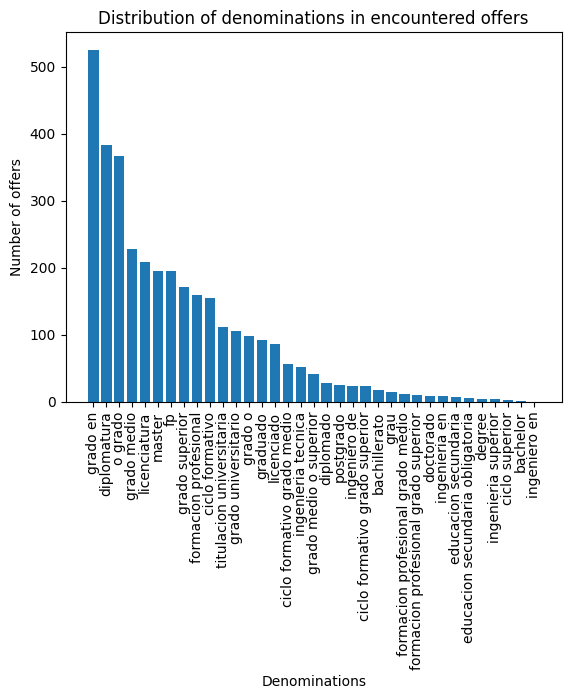

In [16]:
# Get all the offers with "denominacion" and "titulo"
test_offers = [offer for offer in offers if 'titulos_raw' in offer]
print("Total ofertas: ", len(offers))
print("Total ofertas encontradas: ", len(test_offers))
# print the porcentage of offers with "denominacion" and "titulo"
percentage = len(test_offers) / len(offers) * 100
print("Porcentaje: {:.2f}%".format(percentage))
with open("offers.json", 'w') as f:
    json.dump(test_offers, f, indent=4)
# Print how many offers detect in test_offers for each denominacion
obtained_denominations = {}
for offer in test_offers:
    for denomination in offer['denominacion_nivel']:
        if denomination not in obtained_denominations:
            obtained_denominations[denomination] = 0
        else:
            obtained_denominations[denomination] += 1
# Sort by values
obtained_denominations = dict(sorted(obtained_denominations.items(), key=lambda item: item[1], reverse=True))
# And plot the results, in a bar plot
plt.bar(obtained_denominations.keys(), obtained_denominations.values())
plt.title("Distribution of denominations in encountered offers")
plt.xlabel("Denominations")
plt.ylabel("Number of offers")
plt.xticks(rotation=90)
print(obtained_denominations)

# Clasified

In [17]:
# Get the register with "denominacion_nivel"
correct = [offer for offer in test_offers if 'denominacion_nivel' in offer]
# Save the correct offers
with open("correct_offers.json", 'w') as f:
    json.dump(correct, f, indent=4)

# Errors

In [18]:
# Get the registers without "denominacion_nivel"
errors = [offer for offer in offers if 'denominacion_nivel' not in offer]
# Save the first 100 errors as json file
with open("errors.json", 'w') as f:
    json.dump(errors, f, indent=4)